# ¡Hola Alan! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Alan, el proyecto aún necesita varios ajustes clave para que el análisis sea correcto y funcional, y me permita hacer una revisión adecuada. Es fundamental que revises los tipos de datos en cada dataset y apliques las transformaciones necesarias, ya que esto afecta directamente el tratamiento posterior de la información. También es importante que sigas cuidadosamente las instrucciones del enunciado, especialmente al calcular el consumo de llamadas e internet, pues el orden de los pasos y el tipo de redondeo tienen un impacto directo en los resultados. Además, debes corregir los errores de ejecución en tu notebook para asegurar que todo el flujo de trabajo funcione sin interrupciones. 

Trabajar con orden y precisión no solo te ayudará a evitar errores técnicos, sino que también facilita la interpretación de tus resultados. No te desanimes, cada ajuste que hagas ahora te permitirá desarrollar un proyecto mucho más sólido y confiable.

Estaré atento a tu próxima iteración 👀


</div>

<div class="alert alert-block alert-danger">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Alan has avanzando correctamente en el desarrollo de este proyecto. Has logrado calcular correctamente el cobro mensual para cada usuario. 

Ahora debes continuar con el análisis del comportamiento del consumo de los usuarios y las pruebas de hipótesis. Te deje un par de comentarios específicos para ayudarte a continuar con el proyecto correctamente.

Quedo atento a tu siguiente iteración 🦾


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (3ra Iteración)</b> <a class=“tocSkip”></a>

¡Alan buen trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

In [2]:
## Inicialización

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [4]:
users = pd.read_csv('/datasets/megaline_users.csv')

calls = pd.read_csv('/datasets/megaline_calls.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv')

internet = pd.read_csv('/datasets/megaline_internet.csv')

plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

In [5]:
plans.head()

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
users['reg_date'] = pd.to_datetime(users['reg_date'])

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [7]:
users.info()
users.shape
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date            object
dtype: object

In [8]:
print(users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan  churn_date  
0 2018-12-24  ultimate         NaN  
1 2018-08-13      surf         NaN

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

users['reg_date'] = pd.to_datetime(users['reg_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [10]:
calls.info()
calls.shape
calls.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [11]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Acá debes hacer correcciones en los datos, si se requiere. Por ejemplo, en este caso la columna de fecha *call_date* aparece con un tipo de dato incorrecto, entonces debes ajustarlos. 

Es importante revisar cada dataset para identificar si se requieren ajustes en los datosm

Por otro lado, ten cuidado al incluir texto en el notebook. Asegúrate siempre de que en el menú desplegable de la barra de herramientas esté seleccionado el formato **Markdown** para la celda donde quieres agregar texto. De lo contrario, al ejecutar todas las celdas del notebook, el texto se interpretará como código y generará errores.

<img src="https://digitalhumanities.hkust.edu.hk/wp-content/uploads/2023/08/jupyter-notebook-cell-interface.gif" width="600">   

Acá te comparto información sobre sintaxis básica para incluir tus textos con [Markdown](https://tutorialmarkdown.com/sintaxis)

</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
No

NameError: name 'No' is not defined

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Cuando se habla de enriquecer los datos, se busca crear columnas adicionales que nos permitan tener una visión más amplia de la información. Por ejemplo, a partir de las columnas de fechas puedes obtener los meses, con el fin de estudiar el comportamiento mes a mes de los usuario. Pero también puedes crear otras columnas a tu criterio, esto se conoce como ingeniería de caractterísticas o featuring engineering

</div>

## Mensajes

In [ ]:
messages.info()
messages.shape
messages.dtypes

In [ ]:
messages.head()

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
No sé

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
No

## Internet

In [ ]:
internet.info()
internet.shape
internet.dtypes

In [ ]:
internet.head(10)


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [ ]:
for i, row in plans.iterrows():
    print(f"Tarifa: {row['plan_name'].upper()}")
    print(f"  - Pago mensual: ${row['usd_monthly_pay']}")
    print(f"  - Minutos incluidos: {row['minutes_included']}")
    print(f"  - Mensajes incluidos: {row['messages_included']}")
    print(f"  - GB incluidos: {row['gb_per_month_included']:.1f}")
    print(f"  - Costo por minuto extra: ${row['usd_per_minute']}")
    print(f"  - Costo por mensaje extra: ${row['usd_per_message']}")
    print(f"  - Costo por GB extra: ${row['usd_per_gb']}")
    print()

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print("Después de la conversión:")
print(calls['call_date'].dtype)
print(calls['call_date'].head())

Después de la conversión:
datetime64[ns]
0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]


In [56]:
calls['call_date'] = pd.to_datetime(calls['call_date']) 
calls['year_month'] = calls['call_date'].dt.strftime('%Y-%m')
calls['duration'] = np.ceil(calls['duration']).astype(int) 
minutos_por_mes = calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index()

In [65]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['year_month'] = messages['message_date'].dt.strftime('%Y-%m')
mensajes_por_mes = messages.groupby(['user_id', 'year_month']).size().reset_index(name='total_messages')

In [58]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['year_month'] = internet['session_date'].dt.strftime('%Y-%m')
megas_por_mes = internet.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index()
megas_por_mes['gb_used'] = megas_por_mes['mb_used'] / 1024
megas_por_mes['gb_used'] = np.ceil(megas_por_mes['gb_used']).astype(int)
megas_por_mes = megas_por_mes.drop(columns=['mb_used'])

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [110]:
df_fusionado = minutos_por_mes.merge(
    mensajes_por_mes, on=['user_id', 'year_month'], how='outer'
).merge(
    megas_por_mes, on=['user_id', 'year_month'], how='outer'
)
df_fusionado = df_fusionado.merge(
    users[['user_id', 'plan']], on='user_id', how='left'
)

df_fusionado.rename(columns={'plan': 'plan_name'}, inplace=True)
df_fusionado = df_fusionado.merge(
    plans, on='plan_name', how='left'
)

df_fusionado = df_fusionado.merge(
    users[['user_id', 'city']], on='user_id', how='left'
)

In [111]:
df_fusionado.rename(columns={'duration': 'total_minutes', 'gb_used': 'total_gb'}, inplace=True)

df_fusionado[['total_minutes', 'total_messages', 'total_gb']] = \
    df_fusionado[['total_minutes', 'total_messages', 'total_gb']].fillna(0)

In [112]:
df_fusionado.info()
print(df_fusionado.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   year_month             2293 non-null   object 
 2   total_minutes          2293 non-null   float64
 3   total_messages         2293 non-null   float64
 4   total_gb               2293 non-null   float64
 5   plan_name              2293 non-null   object 
 6   messages_included      2293 non-null   int64  
 7   mb_per_month_included  2293 non-null   int64  
 8   minutes_included       2293 non-null   int64  
 9   usd_monthly_pay        2293 non-null   int64  
 10  usd_per_gb             2293 non-null   int64  
 11  usd_per_message        2293 non-null   float64
 12  usd_per_minute         2293 non-null   float64
 13  gb_per_month_included  2293 non-null   float64
 14  city                   2293 non-null   object 
dtypes: f

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Recuerda que, según el enunciado del proyecto, los valores de duración de llamadas y consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por minuto y GB completo, para hacer este cálculo el orden en que aplicas cada paso es clave. Para esto debes tener en cuenta lo siguiente:

* **Llamadas:** Primero realiza el redondeo hacia arriba de los minutos para cada llamada y luego sumas los minutos totales por usuario para cada mes.

* **Internet:** Primero sumas el consumo total en MB para cada usuario por mes, luego conviertes ese valor a GB y finalmente realizas el redondeo hacia arriba.

Los valores finales que obtienes para cada usuario, los comparas con los minutos y GB incluidos en cada plan, con el fin de establecer si hubo un exceso en el consumo y hacer el cobro respectivo.
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [113]:
def calculate_monthly_revenue(row):
    total_revenue = row['usd_monthly_pay']
    exceso_minutos = row['total_minutes'] - row['minutes_included']
    costo_minutos = max(0, exceso_minutos) * row['usd_per_minute']
    exceso_mensajes = row['total_messages'] - row['messages_included']
    costo_mensajes = max(0, exceso_mensajes) * row['usd_per_message']
    exceso_gb = row['total_gb'] - row['gb_per_month_included']
    costo_gb = max(0, exceso_gb) * row['usd_per_gb']
    total_revenue += costo_minutos + costo_mensajes + costo_gb
    
    return total_revenue
df_fusionado['monthly_revenue'] = df_fusionado.apply(calculate_monthly_revenue, axis=1)

print("Ingresos mensuales por usuario (primeras 5 filas):")
print(df_fusionado[['user_id', 'plan_name', 'year_month', 'monthly_revenue']].head())

Ingresos mensuales por usuario (primeras 5 filas):
   user_id plan_name year_month  monthly_revenue
0     1000  ultimate    2018-12            70.00
1     1001      surf    2018-08            20.00
2     1001      surf    2018-09            20.00
3     1001      surf    2018-10            90.09
4     1001      surf    2018-11            60.00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Alan debes asegurarte que tu notebook se ejecute completamente sin errores de ejecución. En este caso, estás obteniendo un error debido a que tu dataset **df_fusionado** no tiene ninguna columna con el sufijo *_y*. Te recomiendo revisar el contenido de tu dataset para saber con qué información y columna cuentas,

Asimismo, antes de enviar cualquier notebook, siempre selecciona en la barra de herramientas **Kernel** y luego dale en **Restart & Run All Cells**, de esa forma se ejecutarán en orden todas las celdas del notebook y podrás identificar si hay algún error.

<img src="https://digitalhumanities.hkust.edu.hk/wp-content/uploads/2023/08/jupyter-runall-button.png" width="700">

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo Alan, has calculando correctamente el cobro mensual para cada usuario

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [114]:
metrics = {
    'total_minutes': 'Minutos',
    'total_messages': 'Mensajes',
    'total_gb': 'Datos (GB)',
    'monthly_revenue': 'Ingreso ($)'
}

# Calcular estadísticas descriptivas (Media, Mediana, Desviación Estándar)
stats_summary = df_fusionado.groupby('plan_name').agg({
    'total_minutes': ['mean', 'median', 'std'],
    'total_messages': ['mean', 'median', 'std'],
    'total_gb': ['mean', 'median', 'std'],
    'monthly_revenue': ['mean', 'median', 'std']
}).round(2)

print("Estadísticas Descriptivas de Consumo e Ingresos por Plan:\n")
print(stats_summary)

Estadísticas Descriptivas de Consumo e Ingresos por Plan:

          total_minutes                total_messages               total_gb  \
                   mean median     std           mean median    std     mean   
plan_name                                                                      
surf             428.75  425.0  234.45          31.16   24.0  33.57    16.67   
ultimate         430.45  424.0  240.51          37.55   30.0  34.77    17.31   

                       monthly_revenue                
          median   std            mean median    std  
plan_name                                             
surf        17.0  7.85           60.71  40.36  55.39  
ultimate    17.0  7.67           72.31  70.00  11.40  


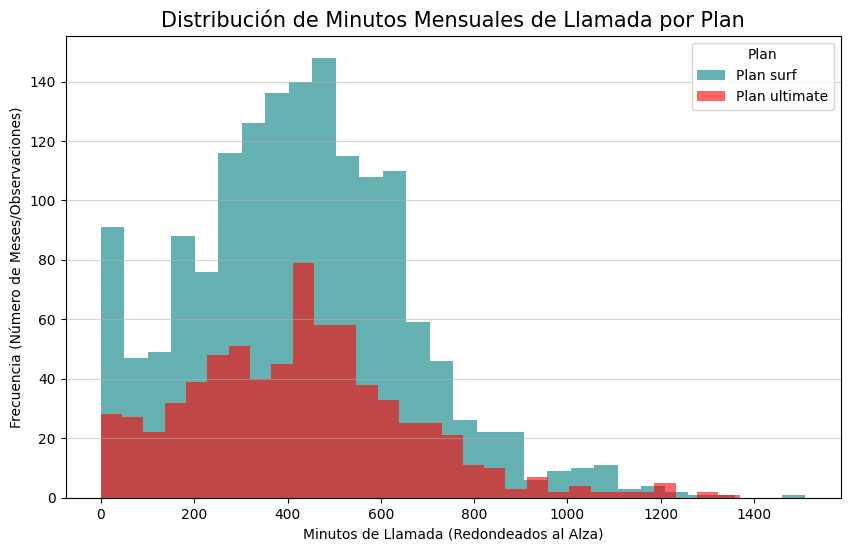

In [92]:
surf_minutes = df_fusionado[df_fusionado['plan_name'] == 'surf']['total_minutes']  # ← Cambios aquí
ultimate_minutes = df_fusionado[df_fusionado['plan_name'] == 'ultimate']['total_minutes']  # ← Y aquí

plt.figure(figsize=(10, 6))
plt.hist(
    surf_minutes,
    bins=30,
    alpha=0.6,
    label='Plan surf',
    color='teal'
)
plt.hist(
    ultimate_minutes,
    bins=30,
    alpha=0.6,
    label='Plan ultimate',
    color='red'
)

plt.title('Distribución de Minutos Mensuales de Llamada por Plan', fontsize=15)
plt.xlabel('Minutos de Llamada (Redondeados al Alza)')
plt.ylabel('Frecuencia (Número de Meses/Observaciones)')
plt.legend(title='Plan')
plt.grid(axis='y', alpha=0.5)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Estás obteniendo una gráfica vacía debido a que estás usando los nombres *Surf* y *Ultimate* como filtro. No obstante, los nombres correctos para los planes son *surf* y *ultimate*, es decir que están escritos totalmente en minúscula. Si haces este ajuste podrás obtener los histogramas

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo ajustando la gráfica


</div>

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [93]:
mean_calls_overall = df_fusionado['total_minutes'].mean()
variance_calls_overall = df_fusionado['total_minutes'].var()

summary_calls = df_fusionado.groupby('plan_name')['total_minutes'].agg(['mean', 'var'])

<Figure size 800x600 with 0 Axes>

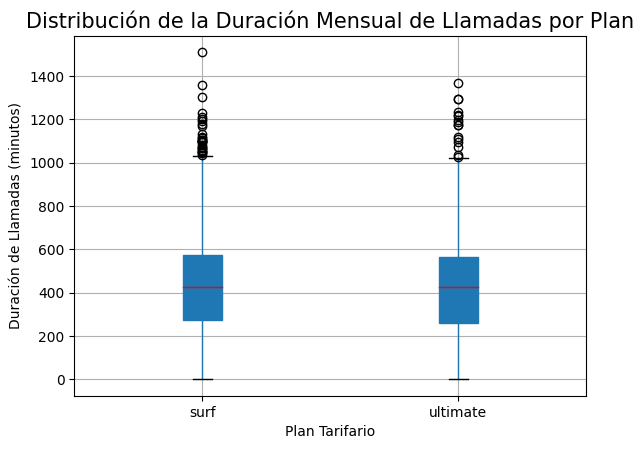

In [94]:
plt.figure(figsize=(8, 6))

df_fusionado.boxplot(
    column='total_minutes', 
    by='plan_name', 
    grid=True,
    patch_artist=True,
    medianprops={'color': 'red'}
)

plt.suptitle('')
plt.title('Distribución de la Duración Mensual de Llamadas por Plan', fontsize=15)
plt.xlabel('Plan Tarifario')
plt.ylabel('Duración de Llamadas (minutos)')

plt.show()



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

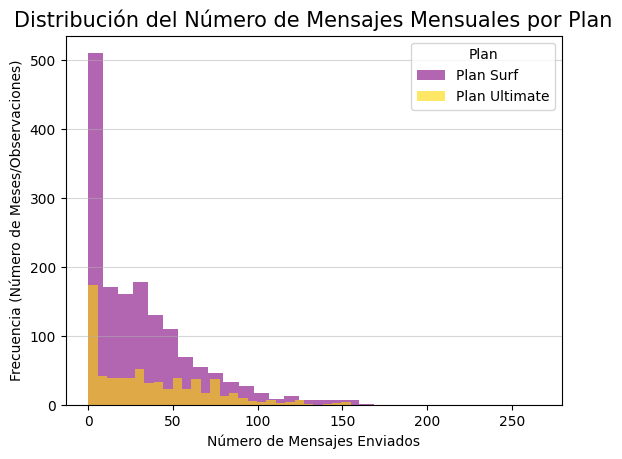

In [95]:
surf_messages = df_fusionado[df_fusionado['plan_name'] == 'surf']['total_messages']
ultimate_messages = df_fusionado[df_fusionado['plan_name'] == 'ultimate']['total_messages']

plt.hist(
    surf_messages, 
    bins=30, 
    alpha=0.6, 
    label='Plan Surf', 
    color='purple'
)

plt.hist(
    ultimate_messages, 
    bins=30, 
    alpha=0.6, 
    label='Plan Ultimate', 
    color='gold'
)

plt.title('Distribución del Número de Mensajes Mensuales por Plan', fontsize=15)
plt.xlabel('Número de Mensajes Enviados')
plt.ylabel('Frecuencia (Número de Meses/Observaciones)')
plt.legend(title='Plan')
plt.grid(axis='y', alpha=0.5)
plt.show()

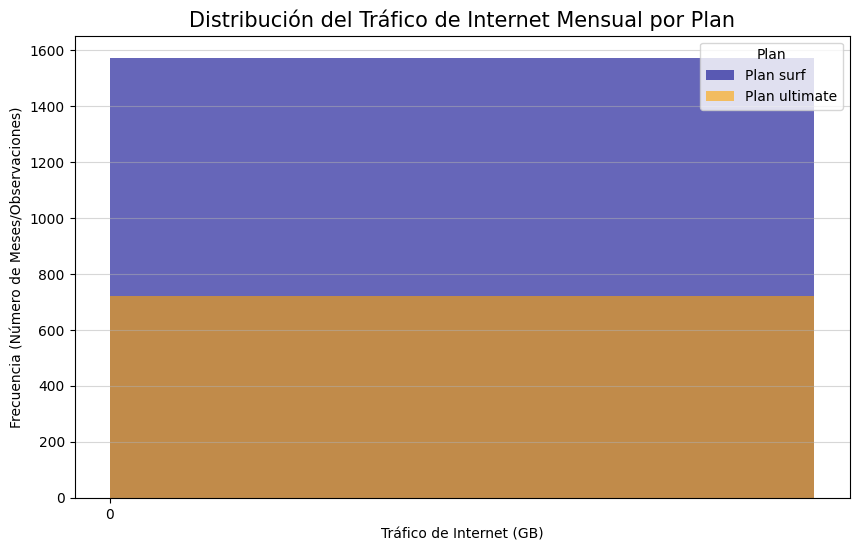

In [97]:
surf_data = df_fusionado[df_fusionado['plan_name'] == 'surf']['total_gb']
ultimate_data = df_fusionado[df_fusionado['plan_name'] == 'ultimate']['total_gb']
bins = np.arange(0, df_fusionado['total_gb'].max() + 2048, 2048)

plt.figure(figsize=(10, 6))

plt.hist(
    surf_data,
    bins=bins,
    alpha=0.6,
    label='Plan surf', 
    color='darkblue'
)

plt.hist(
    ultimate_data,
    bins=bins,
    alpha=0.6,
    label='Plan ultimate',
    color='orange'
)

plt.title('Distribución del Tráfico de Internet Mensual por Plan', fontsize=15)
plt.ylabel('Frecuencia (Número de Meses/Observaciones)')
plt.legend(title='Plan')
plt.grid(axis='y', alpha=0.5)

bins_gb = bins / 1024
plt.xticks(bins[::2], np.round(bins_gb[::2]).astype(int))
plt.xlabel('Tráfico de Internet (GB)')

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [100]:

surf_data = df_fusionado[df_fusionado['plan_name'] == 'Surf']['total_gb']
ultimate_data = df_fusionado[df_fusionado['plan_name'] == 'Ultimate']['total_gb']

# 2. Calcular las estadísticas descriptivas para ambos planes
internet_stats = df_fusionado.groupby('plan_name')['total_gb'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).round(2)

print("Estadísticas Descriptivas del Consumo Mensual de Internet (GB):\n")
print(internet_stats)

Estadísticas Descriptivas del Consumo Mensual de Internet (GB):

            mean  median   std  min   max
plan_name                                
surf       16.67    17.0  7.85  0.0  70.0
ultimate   17.31    17.0  7.67  0.0  46.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

La estructura de análisis del comportamiento de consumo de los usuarios (visualizaciones y cálculo de valores estadísticos) que empleaste para los datos de **llamadas** está muy bien. Debes usar la misma estructura de análisis para los demás conjuntos de datos: **mensajes, internet e ingresos**, es decir mostrar los mismos gráficos y obtener los valores estadísticos para estos conjunto de datos. Lo anterior, con el fin de lograr hacer una comparación detallada del comportamiento de los usuarios de cada plan.

Asegúrate de incluir las gráficas, datos y análisis de cada conjunto de datos en su sección correspondiente, de este modo el proyecto estará más ordenado y será más fácil de seguir.

</div>

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

Estadísticas de Ingresos Mensuales por Plan ($):

            mean  median    std   min     max  Q1 (25%)  Q3 (75%)
plan_name                                                        
surf       60.71   40.36  55.39  20.0  590.37      20.0     80.36
ultimate   72.31   70.00  11.40  70.0  182.00      70.0     70.00


<Figure size 800x600 with 0 Axes>

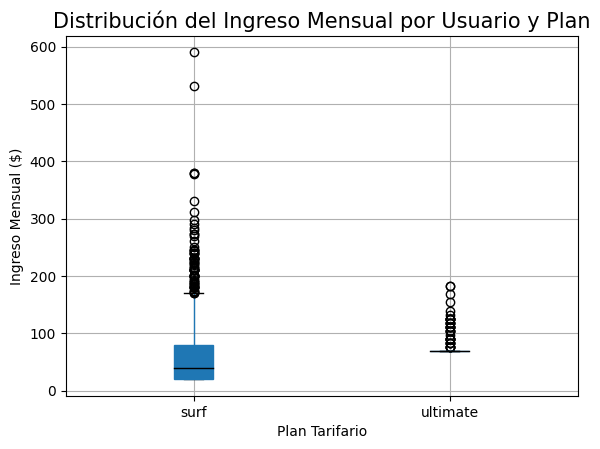

In [115]:
revenue_stats = df_fusionado.groupby('plan_name')['monthly_revenue'].agg(
    ['mean', 'median', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
).rename(columns={'<lambda_0>': 'Q1 (25%)', '<lambda_1>': 'Q3 (75%)'}).round(2)

print("Estadísticas de Ingresos Mensuales por Plan ($):\n")
print(revenue_stats)

plt.figure(figsize=(8, 6))

df_fusionado.boxplot(
    column='monthly_revenue', 
    by='plan_name', 
    grid=True,
    patch_artist=True,
    medianprops={'color': 'black'}
)

plt.suptitle('')
plt.title('Distribución del Ingreso Mensual por Usuario y Plan', fontsize=15)
plt.xlabel('Plan Tarifario')
plt.ylabel('Ingreso Mensual ($)')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [116]:
revenue_surf = df_fusionado[df_fusionado['plan_name'] == 'surf']['monthly_revenue']
revenue_ultimate = df_fusionado[df_fusionado['plan_name'] == 'ultimate']['monthly_revenue']

results = st.ttest_ind(
    revenue_surf, 
    revenue_ultimate, 
    equal_var=False
)
alpha = 0.05

print(f"Valor p (p-value): {results.pvalue:.4f}")
print(f"Estadístico t: {results.statistic:.4f}")

if results.pvalue < alpha:
    print("\nConclusión: Se RECHAZA la hipótesis nula (H0).")
    print("Existe una diferencia estadísticamente significativa entre los ingresos promedio de los planes Surf y Ultimate.")
else:
    print("\nConclusión: NO se puede rechazar la hipótesis nula (H0).")
    print("No hay evidencia suficiente para afirmar que los ingresos promedio de los planes son diferentes.")

Valor p (p-value): 0.0000
Estadístico t: -7.9521

Conclusión: Se RECHAZA la hipótesis nula (H0).
Existe una diferencia estadísticamente significativa entre los ingresos promedio de los planes Surf y Ultimate.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [118]:
ny_nj_cities = [
    'New York-Newark-Jersey City, NY-NJ-PA MSA'
]

df_fusionado['is_NY_NJ'] = df_fusionado['city'].apply(
    lambda x: 'NY-NJ' if any(region in x for region in ny_nj_cities) else 'Otras'
)

revenue_nynj = df_fusionado[df_fusionado['is_NY_NJ'] == 'NY-NJ']['monthly_revenue']
revenue_otras = df_fusionado[df_fusionado['is_NY_NJ'] == 'Otras']['monthly_revenue']



results = st.ttest_ind(
    revenue_nynj, 
    revenue_otras, 
    equal_var=False
)

alpha = 0.05

print(f"Valor p (p-value): {results.pvalue:.4f}")
print(f"Estadístico t: {results.statistic:.4f}")

if results.pvalue < alpha:
    print("\nConclusión: Se RECHAZA la hipótesis nula (H0).")
    print("Existe una diferencia estadísticamente significativa entre los ingresos promedio de la región NY-NJ y otras regiones.")
else:
    print("\nConclusión: NO se puede rechazar la hipótesis nula (H0).")
    print("No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes entre las regiones.")

Valor p (p-value): 0.0335
Estadístico t: -2.1309

Conclusión: Se RECHAZA la hipótesis nula (H0).
Existe una diferencia estadísticamente significativa entre los ingresos promedio de la región NY-NJ y otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteración)</b> <a class=“tocSkip”></a>

Alan aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (3ra Iteración)</b> <a class=“tocSkip”></a>


Te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (3ra Iteración)</b> <a class=“tocSkip”></a>

Recuerda siempre incluir tu conclusión del proyecto que has realizando, en la cual se reúna y resuma de manera ordenada toda la información obtenida dándole un enfoque con relación al caso de estudio, permitiendo así cerrar el estudio con una visión integral y bien fundamentada.

</div>